<a href="https://colab.research.google.com/github/khanrasanju420/Bike-shearing-Demand-Prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Seoul Bike Sharing Demand Prediction



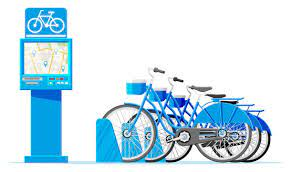

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -** SANJU KHANRA


# **Project Summary -**



This projest presents a rule-based regression predictive model for bike sharing demand prediction. A bike-sharing system provides people with a sustainable mode of transportation and has beneficial effects for both the environment and the user. In recent days, Pubic rental bike sharing is becoming popular because of is increased comfortableness and environmental sustainability. Data used include Seoul Bike and Capital Bikeshare program data. Data have weather data associated with it for each hour. For the dataset, we are using linear regression model were train with optimize hyperparameters using a repeated cross validation approach and testing set is used for evaluation. Multiple evaluation indices such as 𝑅 2 , Root Mean Square error are use to measure the prediction performance of the regression models. The performance of the model is vary with the time interval used in transforming data.

The increased usage of private vehicles in metropolitan areas has resulted in significant rise in fuel consumption’s that have adverse effect on the climate. It has led people in today’s society to accept problems like road traffic as the norm. Therefore the government and organzations started adopting measures to facilitate sustainable development to address the issue. Many countries have bike sharing system, such as bike sharing system in South Korea, which started to overcome all this issues and to develop a healthy environment for citizen of Seoul to live. In that context, the Bike Share initiative was launched to tackle the public mobility problem. It provided the people with an alternative to using a sustainable mode of transport for a small distance at a minimal cost. And gave people the freedom to utilize the service by themselves. In a bike-share system, a user could lend a bike from any bike stations and return it to a bike station near the destination and since it involves the activity of pedalling the bike it has beneficial health effects. And the city-wide installation of bike stations improved the accessibility of areas by bikes. Docking stations are computerized stands for the purpose of pickup and drop off of the rental bikes. Users of public bikes can rent and return rental bikes at any docking station. With this kind of smart technology and convenience, the use of Rental bike is increasing every day. So, there is a need to manage the bike rental demand and manage the continuous and convenient service for the users. This study proposes a data mining based approach including weather data to predict whole city public bike demand. A rule-based model is used to predict the number of rental bikes needed at each hour.



# **GitHub Link -**

https://github.com/khanrasanju420/Bike-shearing-Demand-Prediction

# **Problem Statement**



Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd     #(provides wide variety tools for data analysis,many inbuilt methods for grouping,)
                         #(combining and filtering data.)
    
import numpy as np      #for some basic mathematical operations

from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations

import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree
from sklearn.ensemble import BaggingRegressor


import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Seoul_Bike_Sharing_Demand_Prediction/SeoulBikeData.csv"
bike_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Seoul_Bike_Sharing_Demand_Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

In [ ]:
bike_df.tail()

In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape
     

In [ ]:
print(f'There are {bike_df.shape[0]} Rows and {bike_df.shape[1]} Columns in the dataset')
     

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate entry in dataset is :",bike_df.duplicated().sum())
     

**Not found any duplicated entries inside the dataset**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

**In this dataframe NaN value is not present**

In [ ]:
# Visualizing the missing values
bike_df.isna().sum()

In [ ]:
pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
     

In [ ]:
pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
     


In [ ]:
missing = pd.DataFrame((bike_df.isnull().mean())*100).reset_index()
plt.figure(figsize=(8,3))
ax = sns.pointplot(data=missing,x="index",y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Not found any missing values inside the dataset** 

### What did you know about your dataset?

In [ ]:
# Custom Function for Dtype,Unique values and Null values
def bike_df_info():
    bike = pd.DataFrame(index=bike_df.columns)
    bike['DataType'] = bike_df.dtypes
    bike["Non-null_Values"] = bike_df.count()
    bike['Unique_Values'] = bike_df.nunique().sort_values(ascending=True)
    bike['NaN_Values'] = bike_df.isnull().sum()
    bike['NaN_Values_Percentage'] = (bike['NaN_Values']/len(bike_df))*100 
    return bike

In [ ]:
# Custom Function
bike_df_info()

# Finding details from data:

1. There are 14 features with 8760 rows of data.
2. There are 4 categorical columns and 10 numerical columns. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type
3. Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type
4. olumns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type
5. Not any null value present in any column
6. Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2, Date-365, Rented Bike Count-2166, Hour-24, Temperature(°C)-546 etc.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Features of the dataset:")
bike_df.columns
     

In [ ]:
# Dataset Describe
bike_df.describe().T      #.T use for transpose the describe table

### Variables Description 

**Breakdown of Our Features:**

**Date :** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count :** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

**Checking the possible values important and meaningful categorical columns can have**

In [ ]:
# Check Unique Values for each variable.
print(bike_df["Seasons"].unique())
     

In [ ]:
print(bike_df["Holiday"].unique())

In [ ]:
print(bike_df["Functioning Day"].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
bike_df.head(2)

In [ ]:
bike_df.columns.values

In [ ]:
bike_df.groupby("Functioning_Day")["Rented_Bike_Count"].sum().sort_values(ascending=False).reset_index()
     


**As per diagnosis data found that rental bike only given on Functioning Day,So remove Functioning Day Column.**

In [ ]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
bike_df1=bike_df.drop(["Functioning_Day"],axis=1)

In [ ]:
#check the new shape of the dataset
print(f"New shape of the dataset is {bike_df1.shape}")
     

In [ ]:
#convert datetime to datatype
import datetime as dt
bike_df1['Date'] = bike_df1['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
     

In [ ]:
#Seperate Day, Month, Year from DataFrame Column
bike_df1['Day']=bike_df1['Date'].dt.day_name()
bike_df1['Month']=bike_df1['Date'].dt.month_name()
bike_df1['Year']=bike_df1['Date'].dt.year

In [ ]:
bike_df1.head(10)

In [ ]:
bike_df1["Year"].unique()

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df1['weekdays_weekend']=bike_df1['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df1=bike_df1.drop(columns=['Date','Day','Year'],axis=1)
     

In [ ]:
bike_df1.info()

In [ ]:
bike_df1.head(2)

In [ ]:
bike_df1['weekdays_weekend'].value_counts()
     

In [ ]:
#Change the int64 column into catagory column
columns1=['Hour','Seasons','Holiday','Month','weekdays_weekend']
for col in columns1:
  bike_df1[col]=bike_df1[col].astype('category')

In [ ]:
#Change the int64 column into float column
columns2=["Rented_Bike_Count","Humidity","Visibility"]
for col in columns2:
  bike_df1[col]=bike_df1[col].astype('float')
     

In [ ]:
#let's check the result of data type
bike_df1.info()

In [ ]:
bike_df1.columns
     

## percentage of missing values in each column

In [ ]:
pd.options.display.float_format = '{:,.2f} %'.format
print((bike_df1.isnull().sum()/len(bike_df1))*100)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
bike_df1.info()

### What all manipulations have you done and insights you found?

1. As per diagnosis data found that rental bike only given on Functioning Day, remove Functioning Day Column.
2. So we convert the "date" column into 3 different column i.e "year","month",day".
3. The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
4. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.
5. As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

### **4. Exploratory Data Analysis & Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.**

**We'll use libraries Matplotlib, Seaborn for visualization.**

#### Chart - 1

## Chart - 1 Relation between 'Month' and 'Rented_bike_count'

In [ ]:
bike_df1.head(2)

In [ ]:
# Chart - 1 visualization code

fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=bike_df1,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')
     

##### 1. Why did you pick the specific chart?

To see the distribution of the Rented_bike_count in each month

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that from the month June, JULY, May to October or september the demand of the rented bike is high as compare to other months.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



In the summer season the rented bike business will go high as compare to winter season.

#### Chart - 2

## Count of Rented bikes according to Weekdays_Weekend and Time

In [ ]:
bike_df1.head(2)

In [ ]:

# mean distribution of Rented bike betwwn weekdays and weeend
bike_df1.groupby("weekdays_weekend")["Rented_Bike_Count"].mean().reset_index()
     


In [ ]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df1,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to weekdays and weekend ')
plt.show()

In [ ]:
# visualization code
fig,ax=plt.subplots(figsize=(14,7))
sns.pointplot(data=bike_df1,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of use of Rented bikes acording to weekdays_weekend and time .

##### 2. What is/are the insight(s) found from the chart?

1. From the above bar plot we can clearly say that the mean distribution of rented bike between Weekdays and weekend is almost same.
But in weekdays its slightly higher due to office and weekend its slightly lower.

2. From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.
Peak Time are 7 am to 9 am and 5 pm to 7 pm

3. The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



From the above graph we can say that we can run the business in entire week. and It will not affect our profit margins.

Weekdays in office time between 7 am to 9 am and 5pm to 7pm the demand of rented bike increases

Similarly in weekend from 4pm to 8pm the demand slightly increases compare to others time.

#### Chart - 3

## Relation between Rented Bikes count and Hours

In [ ]:
bike_df1.head(2)

In [ ]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')
plt.show()

##### 1. Why did you pick the specific chart?

To see the use of rented bike according the hours.

##### 2. What is/are the insight(s) found from the chart?

In the above plot which shows the use of rented bike according the hours and the data are from all over the year.generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



From the above graph which show that maximum demend of rented bikes comes at the time working hour from 7am to 9am and 5pm to 7pm and

minimum demend of rented bikes comes in the morning .

#### Chart - 4

## Count of Rented bikes according to *Seasons*

In [ ]:
bike_df1.head(2)

In [ ]:
# Chart - 4 visualization code

fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=bike_df1,x="Seasons",y="Rented_Bike_Count",ax=ax,capsize=.2)
ax.set(title="Count of Rented bikes according to Seasons")
plt.show()

In [ ]:
# visualization code
fig,ax=plt.subplots(figsize=(14,7))
sns.pointplot(data=bike_df1,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes according to Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

*To see the distribution of use of Rented bikes acording to Seasons .*

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,

1. In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.

2. In winter season the use of rented bike is very low because of snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In summer, Spring and Autumn seasons the use of rented bike are high so it is profitable to do business in that time. And at the time of summer we will get maxium profit.

In winter season the use of rented bike is very low because of snowfall. Due to that we will get minimum profit mergin.

#### Chart - 5

## Analyze of Numerical variables

In [ ]:
# Chart - 6 visualization code
bike_df1.head(2)

In [ ]:
bike_df1.info()

In [ ]:
#if dtype is not Equal to object type then its a num data
numerical_features=[col for col in bike_df1.columns if bike_df1[col].dtype=="float"]
numerical_features
     

In [ ]:
# Seprate dataframe for Numerical feature
num_data=bike_df1[numerical_features]
num_data.head(5)

In [ ]:
for column in numerical_features :
  fig = plt.figure(figsize=(6, 3))
  sns.distplot(bike_df1[column])
  feature = bike_df1[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')

In [ ]:
plt.figure(figsize=(15,10))
for index,column in enumerate(numerical_features) :
  plt.subplot(5,2,index+1)
  sns.distplot(bike_df1[column])
  feature = bike_df1[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')

##### 1. Why did you pick the specific chart?

For and check distribution of numerical and analyse it in the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. From the above plot which shows that mean ranted bike count was 650 and ranted bike count maximum goes to above 3000 in a day.and this is right skew distribution.

2. From the above plot which shows that mean temperatur was 14 degree and the maximum distribution lies between 0 to 30 degree celsius.

3. From the above plot which shows that mean Humidity was 58.

4. From the above plot which shows that mean wind speed in the year was 1.7 m/s and its normal.

5. From the above plot which shows that the maximum days visibility was good and the mean visibility in the year was 1700.

6. From the above plot which shows that the mean Dew poin temperation was 5 degC.and the maximum distribution lies between -5 to +25 deg

7. From the above plot which shows that mean solar radiation lies about 0.6 and maimum days solar radiation lies close to zero.

8. From the above plot which shows that in a year maximum days were dry.

9. From the above plot which shows that in a year maximum days sky was clear and did not have snowfall.

In [ ]:

bike_df1.agg(['skew','kurtosis']).T

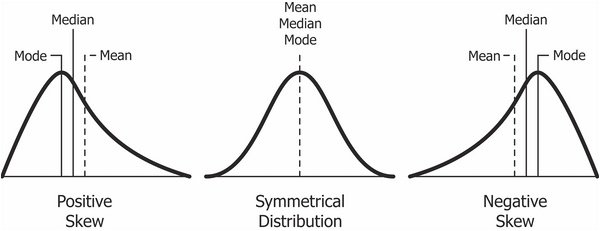

Right/Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed, Solar Radiation

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)

Left/Negative Skewed Distribution: Mean < Median < Mode: visibility(10m),Teperature

Chart - 6

## Numerical vs.Rented_Bike_Count

In [ ]:
# Chart - 7 visualization code
bike_df1.head(2)

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"  
bike_df1.groupby("Temperature")["Rented_Bike_Count"].mean().plot()
plt.show()
     

In [ ]:
#print the plot to analyze the relationship between Humidity and Rented_Bike_Count
bike_df1.groupby("Humidity")["Rented_Bike_Count"].mean().plot()
plt.show()
     

In [ ]:
#print the plot to analyze the relationship between Wind_speed and Rented_Bike_Count
bike_df1.groupby("Wind_speed")["Rented_Bike_Count"].mean().plot()
     

In [ ]:
#print the plot to analyze the relationship between Visibility and Rented_Bike_Count
bike_df1.groupby("Visibility")["Rented_Bike_Count"].mean().plot()
plt.show()

In [ ]:
#print the plot to analyze the relationship between Dew_Point_Teperatue and Rented_Bike_Count
bike_df1.groupby("Dew_point_temperature")["Rented_Bike_Count"].mean().plot()
plt.show()
     

In [ ]:
#print the plot to analyze the relationship between Solar_Radiation and Rented_Bike_Count
bike_df1.groupby("Solar_Radiation")["Rented_Bike_Count"].mean().plot()
plt.show()

In [ ]:
#print the plot to analyze the relationship between Rainfall and Rented_Bike_Count
bike_df1.groupby("Rainfall")["Rented_Bike_Count"].mean().plot()
plt.show()

In [ ]:
#print the plot to analyze the relationship between Snowfall and Rented_Bike_Count
bike_df1.groupby("Snowfall")["Rented_Bike_Count"].mean().plot()
plt.show()

##### 1. Why did you pick the specific chart?

For established relation between Numerical data and Rented_Bike_Count
     


##### 2. What is/are the insight(s) found from the chart?

1. From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average

2. We can see from the above plot that the demand of rented bike is uniformly distribute from 20% to 80% Humidity but when the Humidity was above 80% then the demand of rented bike decrease and below 20% Humidity the demand of rented bike was increased.

3. We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of rented bike also increase that clearly means peoples love to ride bikes when its little windy.

4. We can see from the above plot that the demand of rented bike is uniformly distribute above 500 visibility but below 500 visibility the demand of rented bike slightly less.

5. From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.

6. from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

7. e can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes

8. We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. People like to ride bikes when it is pretty hot around 25°C in average. So its add positive impact to the business.

2. In between 20% to 80% humidity that show a positive lead to the business and below 20%and above 80% humidity lead to negative business growth.

3. The demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of rented bike also increase that clearly means peoples love to ride bikes when its little windy.that is good sign of positive business growth.

4. The day visibility was below 500 that leads to negative growth in the business.

5. The amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000.It was a positive insights in the business.

6. In the time of raining the demend of bike increasing and its give a positive impect in the business.

7. The amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower.It shows that in winter the business is not profitable. The insights that lead to negative growth in the business.

#### Chart - 7

## percentage distribution of the value counts of the categorical features

In [ ]:

# percentage distribution of the value counts of the categorical features
cols=['Month','Holiday','Seasons','Hour','weekdays_weekend']
n=1
plt.figure(figsize=(20,15))
for i in cols:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(bike_df1[i].value_counts(),labels = bike_df1[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()


#### Chart - 8

## Correlation Heatmap

In [ ]:
# Chart - 9 visualization code
# Correlation Heatmap visualization code
data_corr= bike_df1.corr()       
sns.heatmap(data_corr, cmap='bwr', linewidths=0.1, annot=True, linecolor='black')
plt.figure(figsize=(12,6))
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

We can infer the following from the above correlation heatmap -

Temperature and Dew point temperature are highly correlated to each other.

We see a positive correlation between Rented bike count and temperature. Note that this is only true for the range of temperatures provided.

We see a negative correlation among rented bike count with humidity,Rainfall and Snowfall. The more the humidity, Rainfall and Snowfall the less people prefer to bike.

visibility has a weak dependence on Humidity.

#### Chart - 9

## Pair Plot

In [ ]:
# Chart - 10 visualization code
# Pair Plot visualization code
bike_df1.head(2)

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.pairplot(bike_df1)
plt.show()

##### 1. Why did you pick the specific chart?

to understand the best set of features to explain a relationship between two variables or to form the most separated clusters

##### 2. What is/are the insight(s) found from the chart?

1. We can infer the following from the above Pair Plot -

2. When the snofall and Rainfall increased Rented bike count decreased.

3. With the increased of Temperature Rented bike count also increased.

4. There is a positive relation between count and visibility.

5. Visibility has a weak dependence on Humidity

6. When the snofall and Rainfall are decreased solar radiation increased.



#**5. Feature Engineering & Data Pre-processing**

## 1. Regression plot

In [ ]:

for col in bike_df1.select_dtypes(include=["float"]).columns:
  sns.regplot(x=bike_df1[col],y=bike_df1['Rented_Bike_Count'], scatter_kws={"color": 'orange'}, line_kws={"color": "black"})



**From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility','Solar_Radiation' are positively relation to the target variable.**

1. **which means the rented bike count increases with increase of these features.**
2. **'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.**



# 2. Handling Missing Values

In [ ]:
# Chart - 11 visualization code
bike_df1.head(2)

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing = pd.DataFrame((bike_df1.isnull().mean())*100).reset_index()
     

In [ ]:

missing

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## What all missing value imputation techniques have you used and why did you use those techniques?

temperature and Dew point temperature are almost 0.91 correlated, So it's generate multicollinearity issue. 

As we can see above there are no missing value presents thankfully

## 3.Checking of Correlation between variables

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
import statsmodels.api as sm

In [ ]:
#assign the 'x','y' value
X = bike_df1[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df1['Rented_Bike_Count']

In [ ]:
bike_df1.head()

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

In [ ]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

In [ ]:
X.corr()

**1. R sqauare and Adj Square are near to each other. 40% of variance in the Rented 
Bike count is explained by the model.**

**2.For F statistic , P value is less than 0.05 for 5% levelof significance.**

**3. P value of dew point temp and visibility are very high and they are not significant.**

**4. Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**

**5. The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**

**6.Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

**7. From the OLS model we find that the 'Temperature' .**

**8. For clarity, we use visualisation i.e heatmap in next step**

In [ ]:
# Correlation Heatmap visualization code
data_corr= bike_df1.corr()       
sns.heatmap(data_corr, cmap='PiYG', linewidths=0.1, annot=True, linecolor='black')
plt.figure(figsize=(12,6))
plt.show()

**We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :**



*  the temperature
*  the dew point temperature
*  the solar radiation





**And most negatively correlated variables are:**

* Humidity
* Rainfall


* From the above correlation heatmap, We see that there is a positive

correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so the outcome of our analysis.

# **.From this graph we are able to see that there is multicollinearity in temperature(°C) and DeW point temperature(°C) column.**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(bike_df1[[i for i in bike_df1.describe().columns if i not in ['Rented Bike Count','Dew point temperature']]])

In [ ]:

#drop the Dew point temperature column
bike_df1=bike_df1.drop(['Dew_point_temperature'],axis=1)

##4. Handling Outliers

In [ ]:
#show 1st 2 row of dataset
bike_df1.head(2)
     

In [ ]:
bike_df.info()

In [ ]:
# draw boxplot of numeric values of the dataset
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_df1.select_dtypes(include=["float"]).columns):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data=bike_df1, x=col, ax=ax,color='r')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [ ]:
#Finding the IQR
bike_df1_cap=bike_df1.copy()

In [ ]:
#find feature of the dataset
feature=bike_df1_cap.loc[:,['Temperature', 'Humidity', 'Wind_speed','Visibility', 'Solar_Radiation']]

In [ ]:
feature

In [ ]:
#removing the outliner
def iqr_capping(df,cols,factor):                 # this function remover the outliner of dataset with iql method 
  for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)

    iqr=q3-q1

    upper_whisker=q3+(factor*iqr)
    lower_whisker=q1-(factor*iqr)

    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [ ]:
#call the function
iqr_capping(bike_df1_cap,feature,1.5)

In [ ]:
bike_df1_cap

## Box Plot

*In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.*



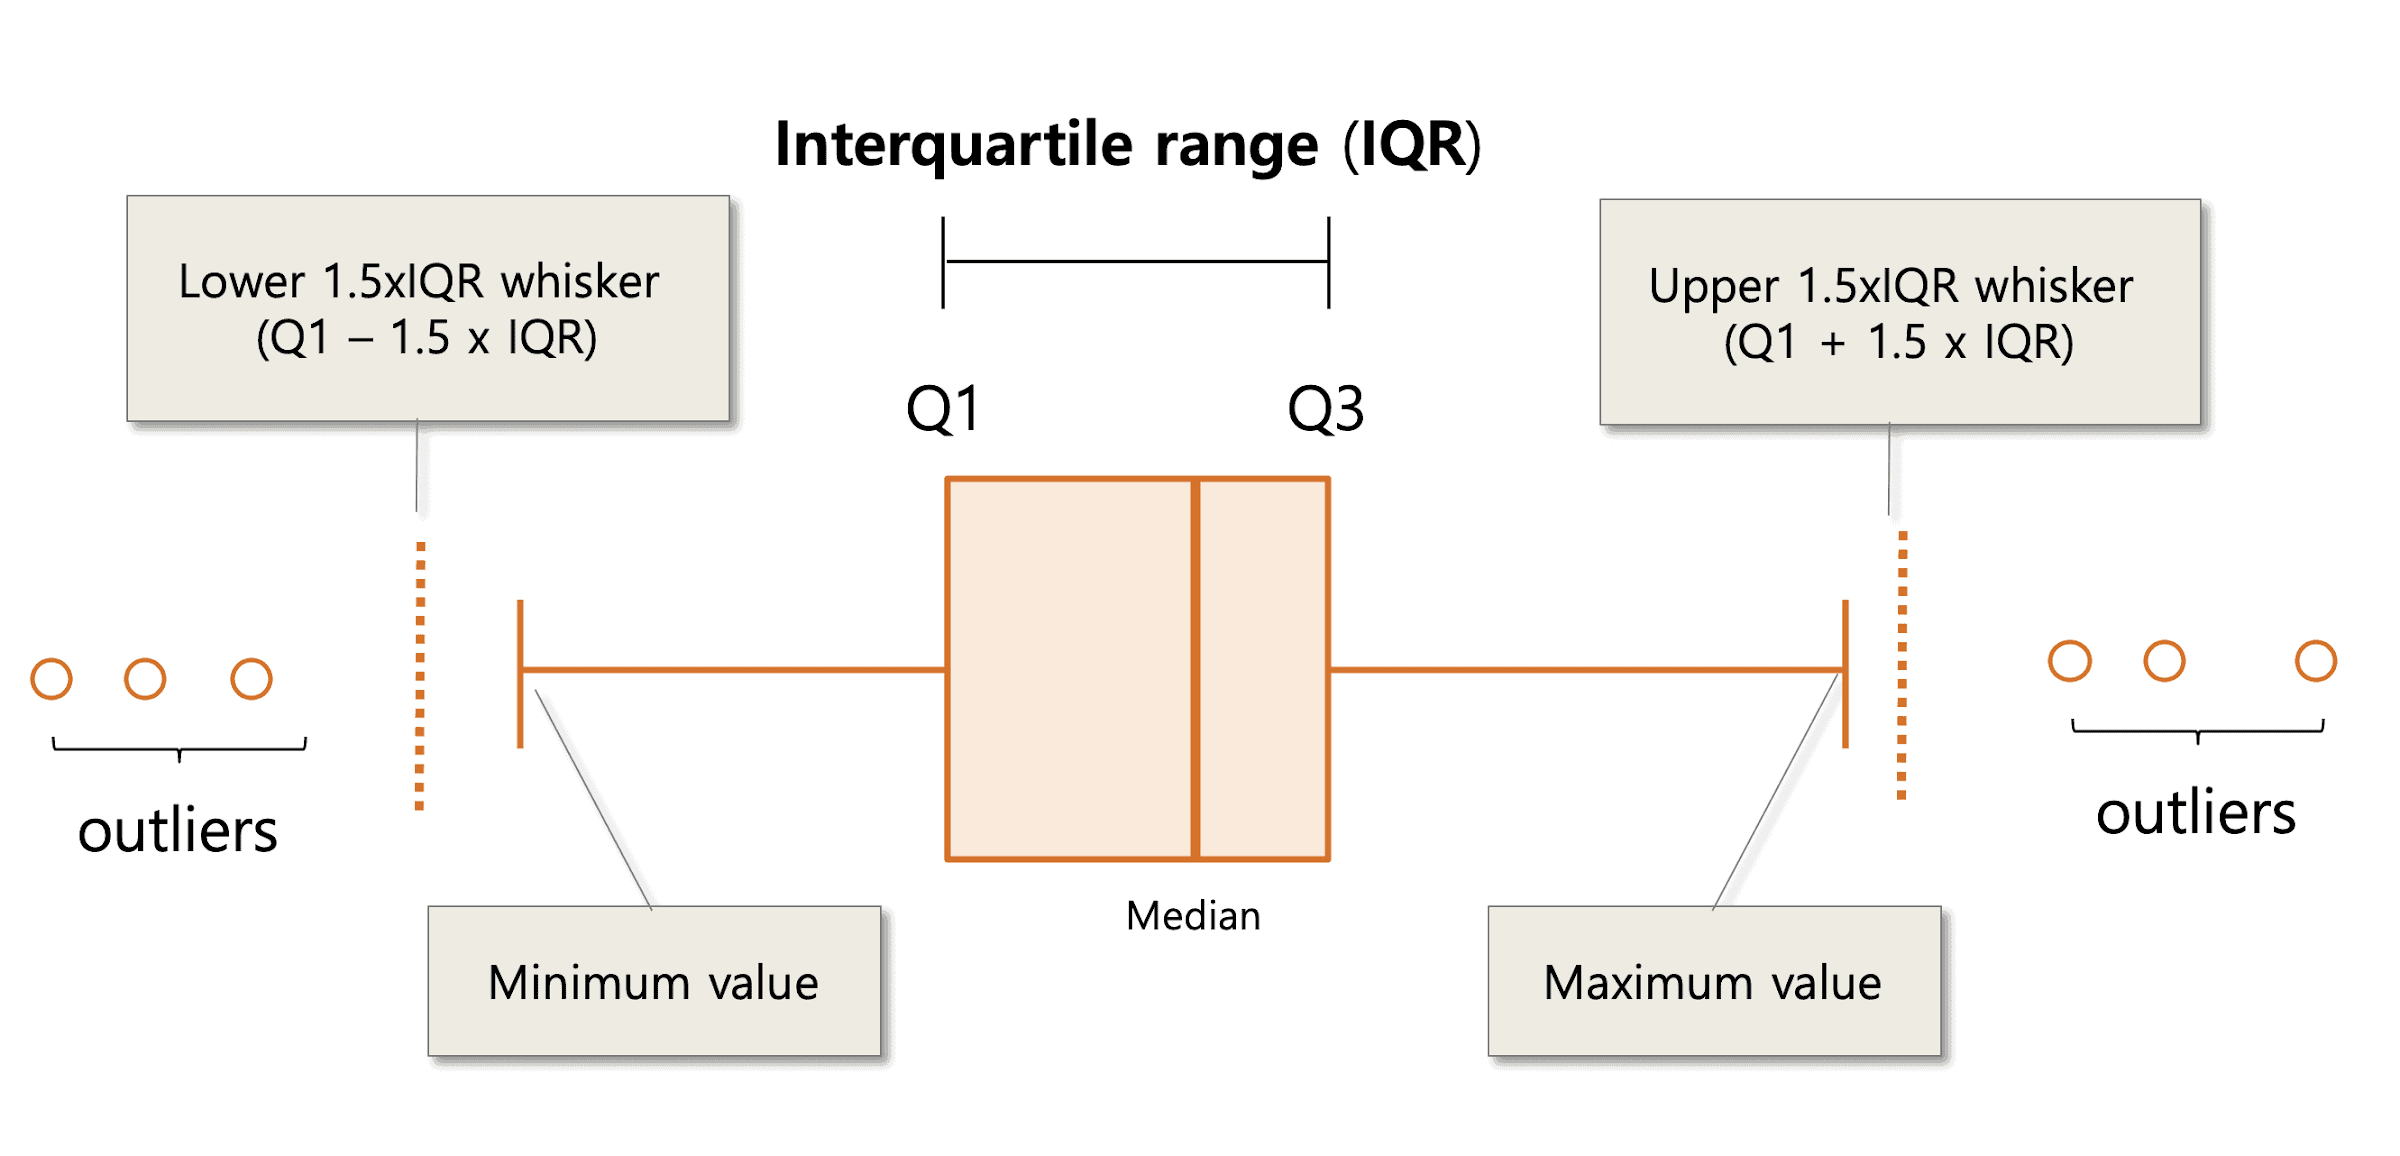



In [ ]:
# final check of outliner in dataset
plt.figure(figsize=(18, 18))
for i, col in enumerate(['Temperature', 'Humidity', 'Wind_speed','Visibility', 'Solar_Radiation']):
    plt.subplot(3,2, i+1)
    sns.boxplot(data=bike_df1_cap, x=col,color='r')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [ ]:
bike_df1_cap.describe().T

**Now which is show that the dataset has no outliner.**

What all outlier treatment techniques have you used and why did you use those techniques?

**Interquartile Range Definition**

* Median: In the box plot, the median is displayed rather than the mean.
* Q1: The first quartile (25%) position.
* Q3: The third quartile (75%) position.
* Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.
* Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

## 5. Data Scaling

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(bike_df1_cap['Rented_Bike_Count'],vert=False)
plt.show()

In [ ]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((bike_df1_cap['Rented_Bike_Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(bike_df1_cap['Rented_Bike_Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(bike_df1_cap['Rented_Bike_Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(bike_df1_cap['Rented_Bike_Count']*2),ax=axes[3], color='green').set_title("cube root")

In [ ]:
import scipy.stats as stats

In [ ]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

In [ ]:
bike_df1_cap.head(2)

In [ ]:
plotvariable(bike_df1_cap,'Rented_Bike_Count')

our Rented Bike Count target is not normally distributed ,so we need to make some transformations before supply to the model

In [ ]:
bike_df1["RBC_qb"]=np.cbrt(bike_df['Rented_Bike_Count']) 
#try cube root technique to convert positive screwd to normal distributation
plotvariable(bike_df1,"RBC_qb")

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(bike_df1["RBC_qb"],vert=False)
plt.show()

In [ ]:
bike_df1_cap['Rented_Bike_Count']=np.sqrt(bike_df1_cap['Rented_Bike_Count'])

plotvariable(bike_df1_cap,'Rented_Bike_Count')

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(bike_df1_cap["Rented_Bike_Count"],vert=False)
plt.show()

**Now, Its Look Like Normal Distributation**

In [ ]:
plotvariable(bike_df1_cap,'Wind_speed')

**not look like normal and right screwed distributation so need to apply transformation**

In [ ]:
bike_df1_cap['Wind_speed']=np.sqrt(bike_df1_cap['Wind_speed'])

plotvariable(bike_df1_cap,'Wind_speed')

look like a normal distribution.

## What all scaling techniques have you used & why did you use those techniques?

**In here I used square root,Cube root and log transformation**

1. Square Root The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.
Square Root Transformation: Transform the values from y to √y.

2. Log Transformation The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.
Log Transformation: Transform the values from y to log(y).

3. Cube root transformation involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data
Cube Root Transformation: Transform the values from y to y^(1/3)

## 6. Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_features=list(bike_df1_cap.select_dtypes(['category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

In [ ]:
bike_df1_cap_copy = bike_df1_cap

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df1_cap_copy = one_hot_encoding(bike_df1_cap_copy, col)
bike_df1_cap_copy.head()  

In [ ]:
bike_df1_cap_copy.shape

## What all categorical encoding techniques have you used & why did you use those techniques?

**In here I used both OdinalEncoder on 'Seasons' feature and OneHotEncoder on 'Hour','Holiday','Month','weekdays_weekend' features.**

* OdinalEncoder is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.

* In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1). This type of encoding is used when the data is nominal. Newly created binary features can be considered dummy variables. After one hot encoding, the number of dummy variables depends on the number of categories presented in the data.

## 8. Data Splitting

In [ ]:
#import Library
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
bike_df1_cap_copy.head(2)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(bike_df1_cap_copy.drop(["Rented_Bike_Count"],axis=1),bike_df1_cap_copy["Rented_Bike_Count"],test_size=0.25,random_state=2)

In [ ]:
x_train.head(2)

In [ ]:
x_test.tail(2)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

## What data splitting ratio have you used and why?

The foregoing data splitting methods can be implemented once we specify a splitting ratio. A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing which I did in here. Other ratios such as 70:30, 60:40, and even 50:50 are also used in practice. There does not seem to be clear guidance on what ratio is best or optimal for a given dataset. The 80:20 split draws its justification from the well-known Pareto principle, but that is again just a thumb rule used by practitioners.

##**6. ML Model Implementation**

* R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.

* Adjusted R2 will always be less than or equal to R2.

* R2 assumes that every single variable explains the variation in the dependent variable.

* The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

* MSE is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value.
* RMSE is an abbreviation for Root Mean Square Error, which is the square root of the value obtained from the Mean Square Error function.

## ML Model-1. LINEAR REGRESSION

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)

In [ ]:
#check the score
reg.score(x_train, y_train)

**Looks like our r2 score value is 0.63 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
reg.coef_

## 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#get the x_train and X-test value
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

**Looks like our r2 score value is 0.63 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

**The r2_score for the test set is 0.60. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##**2. Cross- Validation**

In [ ]:
# Predict on the model
cross_val_score(reg,x_train, y_train,cv=30)

##**ML Model-2. LASSO REGRESSION**

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Lasso Regression uses L1 regularization technique (will be discussed later in this article). It is used when we have more features because it automatically performs feature selection.

## 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(x_train, y_train)
# Create the model score
print(lasso.score(x_test, y_test), lasso.score(x_train, y_train))

In [ ]:
#get the x_train and X-test value
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )


##**Looks like our r2 score value is 0.40 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

##**ML Model - 3. RIDGE REGRESSION**

Ridge regression is a specialized technique used to analyze multiple regression data that is multicollinear in nature. It is a fundamental regularization technique, but it is not used very widely because of the complex science behind it. However, it is fairly easy to explore the science behind ridge regression in r if you have an overall idea of the concept of multiple regression. Regression stays the same, but in regularization, the way the model coefficients are determined is different.

The main idea of ridge regression focuses on fitting a new line that does not fit.

In [ ]:
# ML Model - 3 Implementation
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(x_train,y_train)

In [ ]:
#check the score
ridge.score(x_train, y_train)

In [ ]:
#get the x_train and X-test value
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

##1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

**Looks like our r2 score value is 0.60 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:

# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Predict on the model
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

**Looks like our r2 score value is 0.63 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

##**ML Model-4.RANDOM FOREST**

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(x_train)
y_pred_test_r = rf_model.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(x_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

**Looks like our r2 score value is 0.97 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )


**The r2_score for the test set is 0.74. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
#FIT THE MODEL
rf_model.fit(x_train,y_train)

In [ ]:
features = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##**ML Model-5.Gtadient Boosting**

Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual.

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(x_train,y_train)

In [ ]:
y_pred_train_g = gb_model.predict(x_train)
y_pred_test_g = gb_model.predict(x_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(x_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

**Looks like our r2 score value is 0.74 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

**The r2_score for the test set is 0.69. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(x_train,y_train)

In [ ]:
features = x_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##**Hyperparameter tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

##**Gradient Boosting Regressor with GridSearchCV**

##Provide the range of values for chosen hyperparameters

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(x_train,y_train)

In [ ]:
gb_grid.best_estimator_

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(x_train)
y_pred_g_g= gb_optimal_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
gb_model.fit(x_train,y_train)

In [ ]:
features = x_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##1. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result


From the above dataframe we can chose Gradient Boosting regression model for final prediction model because this model is perform better compare to other model.Random forest regression was also perform good in this model.

## 2. Explain the model which you have used and the feature importance using any model explainability tool?

I have used Gradient boosting regression model for feature importance because it is more accurate compared to other model.


# **Conclusion**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 5 machine learning algorithms Linear Regression,lasso,ridge,Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 97% and 84% recpectively for Train Set and 75% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***